<a href="https://colab.research.google.com/github/polarpolar914/MachineLearning-for-AI/blob/main/2024_2_cap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# 데이터 다운로드
!mkdir -p data
%cd data
!wget https://nextcloud.dongwoo.dev/index.php/s/eSJsS7dTXX7as4i/download/activities.txt # 데이터에 포함된 활동 목록
!wget https://nextcloud.dongwoo.dev/index.php/s/wHKT37RfCJZoCna/download/sample_submission.csv # 제출 파일 형식
!wget https://nextcloud.dongwoo.dev/index.php/s/cLQC6zGYrnpeNSw/download/train.csv # 학습데이터
!wget https://nextcloud.dongwoo.dev/index.php/s/cLQC6zGYrnpeNSw/download/test.csv # 테스트 데이터

/content/data/data/data/data
--2024-11-10 09:21:34--  https://nextcloud.dongwoo.dev/index.php/s/eSJsS7dTXX7as4i/download/activities.txt
Resolving nextcloud.dongwoo.dev (nextcloud.dongwoo.dev)... 183.104.120.147
Connecting to nextcloud.dongwoo.dev (nextcloud.dongwoo.dev)|183.104.120.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209 [text/plain]
Saving to: ‘activities.txt’

activities.txt      100%[===================>]     209  --.-KB/s    in 0s      

2024-11-10 09:21:35 (61.7 MB/s) - ‘activities.txt’ saved [209/209]

--2024-11-10 09:21:35--  https://nextcloud.dongwoo.dev/index.php/s/wHKT37RfCJZoCna/download/sample_submission.csv
Resolving nextcloud.dongwoo.dev (nextcloud.dongwoo.dev)... 183.104.120.147
Connecting to nextcloud.dongwoo.dev (nextcloud.dongwoo.dev)|183.104.120.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50703 (50K) [text/csv]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[===================>]

In [87]:
SEED = 42

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# 파일 목록 확인
import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)

/content/data/test.csv
/content/data/train.csv
/content/data/activities.txt
/content/data/sample_submission.csv
/content/data/data/test.csv
/content/data/data/train.csv
/content/data/data/activities.txt
/content/data/data/sample_submission.csv
/content/data/data/data/test.csv
/content/data/data/data/train.csv
/content/data/data/data/activities.txt
/content/data/data/data/sample_submission.csv
/content/data/data/data/data/test.csv
/content/data/data/data/data/train.csv
/content/data/data/data/data/activities.txt
/content/data/data/data/data/sample_submission.csv


# 데이터 셋 설명

이 데이터셋은 특정 참가자의 생체 데이터를 시간대별로 기록한 것입니다. 각 변수에 대한 설명은 다음과 같습니다:

- **id**: 참가자 번호와 그 참가자의 측정 수를 나타내는 행 ID.
- **p_num**: 참가자 번호.
- **time**: 데이터를 기록한 시간(HH:MM:SS 형식).
- **bg-X:XX**: 혈당 수치(mmol/L). 'X:XX'는 기록 시간보다 얼마나 이전의 수치를 나타내는지를 의미합니다 (예: `bg-2:35`는 현재 시간으로부터 2시간 35분 전의 혈당 수치를 의미).
- **insulin-X:XX**: 5분 간격 동안 투여된 총 인슐린 양(단위: 단위). 'X:XX'는 기록 시간보다 얼마나 이전의 투여량인지를 나타냅니다 (예: `insulin-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이의 인슐린 투여량).
- **carbs-X:XX**: 5분 간격 동안 섭취한 총 탄수화물 양(단위: 그램). 'X:XX'는 기록 시간보다 얼마나 이전의 섭취량을 의미합니다 (예: `carbs-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이의 탄수화물 섭취량).
- **hr-X:XX**: 5분 간격 동안의 평균 심박수(단위: BPM). 'X:XX'는 기록 시간보다 얼마나 이전의 심박수인지 나타냅니다 (예: `hr-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이의 평균 심박수).
- **steps-X:XX**: 5분 간격 동안 걸은 총 걸음 수. 'X:XX'는 기록 시간보다 얼마나 이전에 걸은 걸음 수를 나타냅니다 (예: `steps-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이에 걸은 걸음 수).
- **cals-X:XX**: 5분 간격 동안 소모한 총 칼로리(단위: kcal). 'X:XX'는 기록 시간보다 얼마나 이전에 소모한 칼로리인지를 나타냅니다 (예: `cals-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이에 소모한 칼로리).
- **activity-X:XX**: 5분 간격 동안 스스로 선언한 활동(문자열 형식). 'X:XX'는 기록 시간보다 얼마나 이전에 수행한 활동인지를 나타냅니다 (예: `activity-2:35`는 현재 시간으로부터 2시간 35분에서 2시간 40분 사이에 수행한 활동).
- **bg+1:00**: 한 시간 뒤의 혈당 수치(mmol/L). 이 값은 예측해야 하는 목표 변수로, `test.csv`에는 제공되지 않습니다.

이 데이터는 연속 혈당 모니터, 인슐린 펌프, 스마트워치 등의 기기로 수집한 건강 및 활동 데이터를 포함하며, 참가자의 혈당 수치를 예측하는 모델 개발에 사용됩니다.

In [89]:
# 활동 목록 확인
!cat /content/data/activities.txt

Indoor climbing
Run
Strength training
Swim
Bike
Dancing
Stairclimber
Spinning
Walking
HIIT
Outdoor Bike
Walk
Aerobic Workout
Tennis
Workout
Hike
Zumba
Sport
Yoga
Swimming
Weights
Running


In [90]:
# train.csv을 읽고 pandas dataframe으로 만들기
train = pd.read_csv("/content/data/train.csv")

In [91]:
train.head(10)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

In [92]:
# train데이터 프레임의 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 507 entries, id to activity-0:00
dtypes: float64(432), object(75)
memory usage: 14.1+ MB


In [93]:
# train 데이터 셋의 참가자 목록 확인
train['p_num'].unique()

array(['p01', 'p02', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12', 'p15',
       'p16', 'p18', 'p19', 'p21', 'p22', 'p24'], dtype=object)

In [94]:
# train의 열별 기초통계량
train.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cals-3:20,cals-3:

## 데이터 요약 및 주요 통계

### 주요 컬럼 정보
1. **혈당 수치 (`bg-X:XX` 시리즈)**
   - 다양한 시간대의 혈당 수치 포함.
   - **평균**: 약 8.5 ~ 9, **최소값**: 2.2, **최대값**: 27.8
   - 시간대별 혈당 변화로 관리 패턴 분석 가능.

2. **인슐린 주입량 (`insulin-X:XX` 시리즈)**
   - 대부분 0에 가까우며, 일부 구간에서만 주입.
   - **최소값**과 **최대값**에서 큰 차이를 보임. 주입량 범위: 0.01 ~ 0.1 이상.

3. **탄수화물 섭취량 (`carbs-X:XX` 시리즈)**
   - 섭취량 분포: **중앙값** 약 20 ~ 30, **최대값** 300 이상.
   - 식사와 관련된 시간대별 패턴 확인 가능.

4. **심박수 (`hr-X:XX` 시리즈)**
   - **평균**: 약 75 ~ 78으로 건강한 성인의 심박수와 유사.
   - 특정 시간대에서 높은 심박수 기록. 신체 활동이나 건강 상태와 관련 가능.

5. **걸음 수 (`steps-X:XX` 시리즈)**
   - 주기적인 활동 패턴. 일부 시간대에 높은 활동량 기록.
   - 일상적인 활동 패턴 분석에 유용.

6. **칼로리 소모량 (`cals-X:XX` 시리즈)**
   - 걸음 수 및 심박수와 연관된 활동량 반영.
   - **평균** 약 5 ~ 7, **최대값** 80 이상.
   - 신체 활동 수준을 나타내며, 칼로리 소비 패턴 분석 가능.

### 데이터의 통계적 특성
- **혈당 수치**와 **심박수**는 일정한 경향을 보임.
- **걸음 수, 인슐린, 탄수화물 섭취량** 등은 특정 시간대에 큰 변동이 나타나며 불규칙적.
- **최소값**과 **최대값**의 큰 차이는 생활 패턴이나 특정 이벤트(예: 식사, 운동)와 연관될 가능성.

In [95]:
# 결측치 비율 확인
missing_values = train.isnull().sum()
missing_percentage = missing_values / len(train) * 100
for column, percentage in missing_percentage.items():
    print(f"{column}: {percentage:.2f}%")

id: 0.00%
p_num: 0.00%
time: 0.00%
bg-5:55: 27.00%
bg-5:50: 16.00%
bg-5:45: 13.34%
bg-5:40: 27.06%
bg-5:35: 16.44%
bg-5:30: 13.04%
bg-5:25: 27.14%
bg-5:20: 16.60%
bg-5:15: 12.76%
bg-5:10: 27.09%
bg-5:05: 17.01%
bg-5:00: 12.38%
bg-4:55: 27.06%
bg-4:50: 17.43%
bg-4:45: 11.99%
bg-4:40: 27.09%
bg-4:35: 18.03%
bg-4:30: 11.58%
bg-4:25: 27.14%
bg-4:20: 18.44%
bg-4:15: 11.25%
bg-4:10: 27.28%
bg-4:05: 19.15%
bg-4:00: 11.17%
bg-3:55: 27.39%
bg-3:50: 19.51%
bg-3:45: 10.51%
bg-3:40: 27.36%
bg-3:35: 19.95%
bg-3:30: 10.43%
bg-3:25: 27.69%
bg-3:20: 20.66%
bg-3:15: 10.24%
bg-3:10: 27.99%
bg-3:05: 21.43%
bg-3:00: 10.02%
bg-2:55: 28.24%
bg-2:50: 22.06%
bg-2:45: 9.69%
bg-2:40: 28.24%
bg-2:35: 22.64%
bg-2:30: 9.55%
bg-2:25: 28.54%
bg-2:20: 22.97%
bg-2:15: 9.44%
bg-2:10: 28.65%
bg-2:05: 23.79%
bg-2:00: 9.03%
bg-1:55: 28.81%
bg-1:50: 24.59%
bg-1:45: 8.62%
bg-1:40: 29.09%
bg-1:35: 25.44%
bg-1:30: 8.62%
bg-1:25: 29.36%
bg-1:20: 25.91%
bg-1:15: 8.23%
bg-1:10: 29.31%
bg-1:05: 26.26%
bg-1:00: 7.38%
bg-0:55: 28.8

### 전체 컬럼에 대한 결측치 분석

- **id, p_num, time** (결측치 0%)
  - 필수적인 기본 정보이므로 결측치 없음.

- **bg** (혈당 수치) (주기적인 결측치 발생)
  - 연속 혈당 모니터의 측정 주기나 시스템적 요인으로 인해 일정한 간격으로 결측치가 발생하는 패턴이 보임. 특정 간격마다 결측치 비율이 높아지는 경향이 있음.


- **insulin** (인슐린 투여량) (결측치 4%대)
  - 인슐린 펌프의 자동 기록 덕분에 결측치가 낮음. 일부 사용 설정에 따른 누락 가능성.

- **carbs** (탄수화물 섭취량) (결측치 97% 이상)
  - 참가자의 자가 기록에 의존하므로 기록 누락이 많음. 대부분의 시간에 섭취하지 않음.

- **hr** (심박수) (결측치 40%대)
  - 스마트워치 착용 상태 및 배터리 상황에 따라 결측 발생 가능. 특정 상황에서는 측정이 멈춤.

- **steps** (걸음 수) (결측치 50%대)
  - 밤이나 휴식 시간 등 참가자가 움직이지 않을 경우 결측치 발생 가능성.

- **cals** (칼로리 소모) (결측치 14%~15%)
  - 걸음 수 및 심박수와 관련이 있어 이들 데이터 누락 시 결측 가능성. 기본 신진대사량으로 인해 결측치 비율이 상대적으로 낮음.

- **activity** (활동) (결측치 98% 이상)
  - 수면, 식사 등 특정 시간에는 활동을 기록하지 않음. 참가자가 직접 기록하는 항목이어서 누락 많음.


# 혈당수치

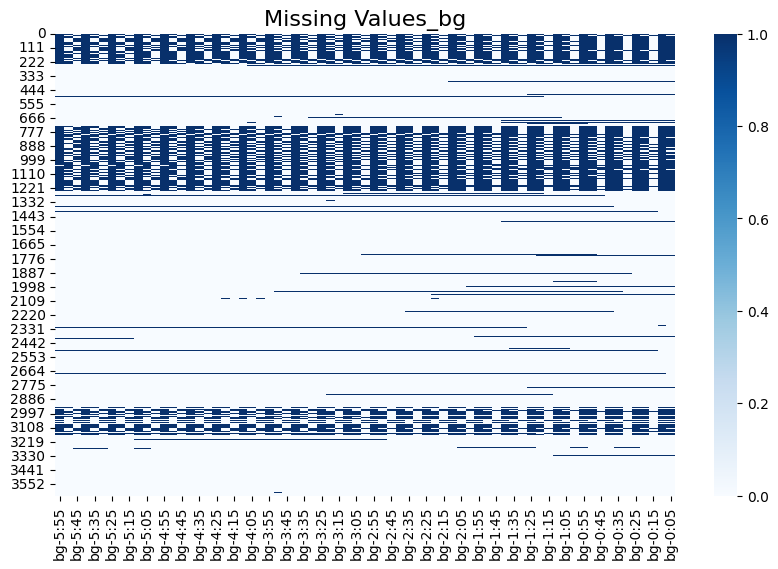

In [96]:
# 혈당 수치 결측치 분포 히트맵

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 데이터 추출
participant_data = {p: train[train['p_num'] == p].iloc[:, list(range(2, 74))] for p in participant_ids}

# 전체 데이터에 대한 결측치 히트맵
G_all = train.iloc[:, list(range(2, 74))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.heatmap(G_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_bg', fontsize=16)
plt.show()


### 혈당 수치 결측치 분포 히트맵 분석

이 그래프는 **혈당 수치(`bg-X:XX`) 데이터의 결측치 분포**를 히트맵으로 나타냅니다. `time`과 여러 `bg-X:XX` 컬럼의 결측 여부를 시각화하며, 진한 파란색은 결측치가 많음을, 연한 색은 데이터가 있음을 의미합니다.


1. **결측 패턴 확인**
   - 각 행은 특정 시간에 기록된 데이터 포인트를, 각 열은 `bg-X:XX` 컬럼을 나타냅니다.
   - 진한 파란색은 결측치를, 연한 색이나 흰색은 데이터가 있음을 의미합니다.

2. **시간에 따른 결측률 차이**
   - 여러 `bg-X:XX` 컬럼 사이에 결측 패턴이 반복적으로 나타납니다.
   - 특정 구간에서 결측치가 집중적으로 발생하는 패턴이 확인됩니다.

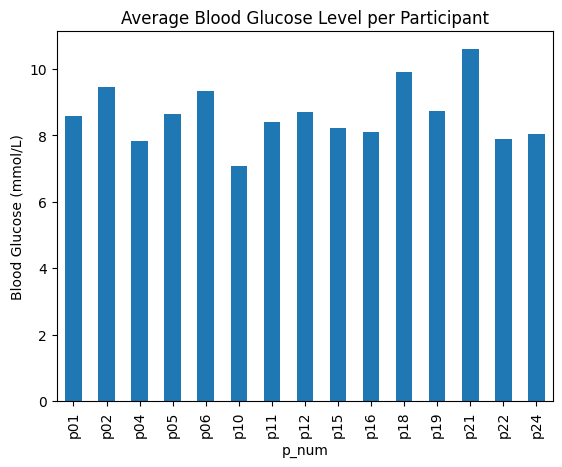

In [97]:
# 참가자별 혈당 평균 비교
participant_avg_bg = train.groupby('p_num')['bg-0:00'].mean()
participant_avg_bg.plot(kind='bar')
plt.title("Average Blood Glucose Level per Participant")
plt.ylabel("Blood Glucose (mmol/L)")
plt.show()

<ipython-input-98-ce474c9ab744>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['hour'] = pd.to_datetime(train['time']).dt.hour


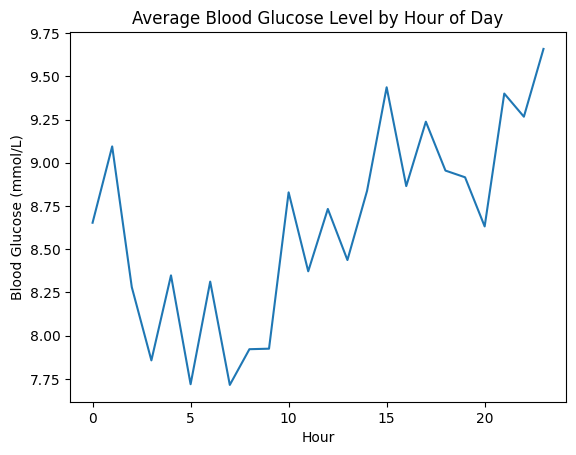

In [98]:
# 시간대별 혈당 수치 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_bg = train.groupby('hour')['bg-0:00'].mean()
hourly_bg.plot(kind='line')
plt.title("Average Blood Glucose Level by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Blood Glucose (mmol/L)")
plt.show()

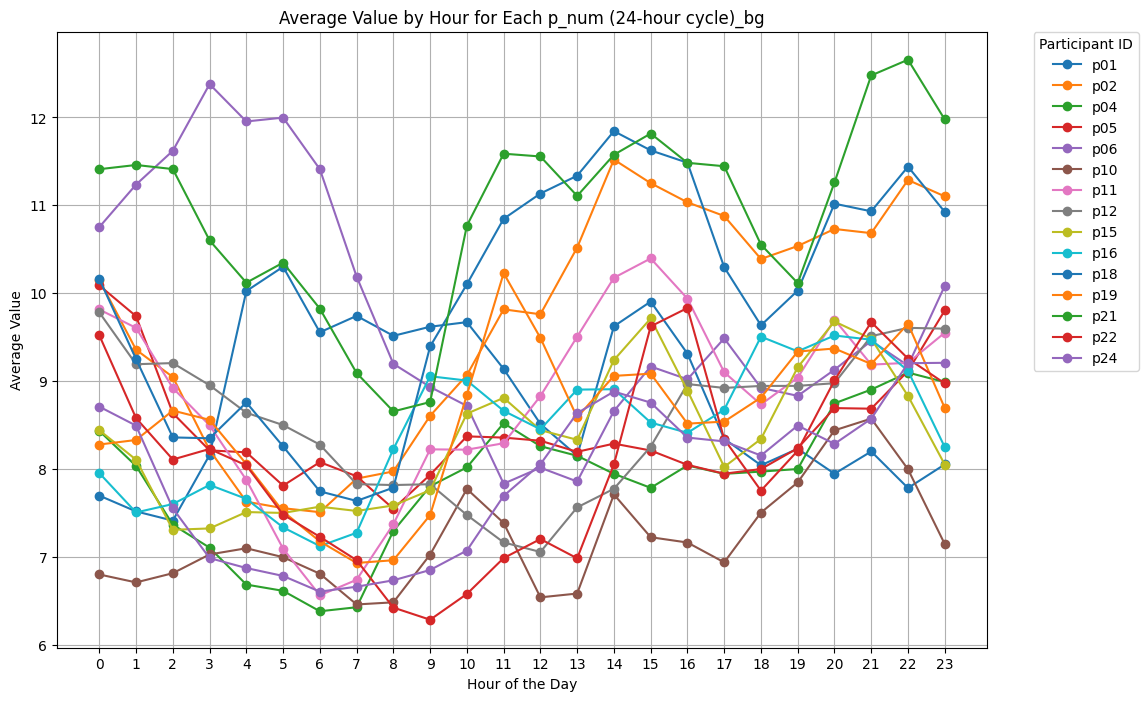

In [99]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt

# 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 혈당 관련 컬럼 추출
bg_cols = [col for col in df.columns if col.startswith('bg-')]

# 각 혈당 컬럼에 대한 시간 오프셋 계산
time_offsets_bg = {}
for col in bg_cols:
    match = re.search(r'bg-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_bg[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_bg = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_bg.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['bg_column'] = col
        time_series_list_bg.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_bg = pd.concat(time_series_list_bg, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_bg['measurement_time'] = pd.to_datetime(time_series_data_bg['measurement_time'])
time_series_data_bg['hour'] = time_series_data_bg['measurement_time'].dt.hour
hourly_avg_by_pnum_bg = time_series_data_bg.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_bg.index:
    plt.plot(hourly_avg_by_pnum_bg.columns, hourly_avg_by_pnum_bg.loc[p_num], marker='o', label=p_num)  # 'p_num: ' 제거

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_bg')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# 시간대별 참가자 혈당 수치 평균 분석

이 그래프는 각 참가자별로 시간대에 따른 평균 혈당 수치를 시각화한 것

## 주요 관찰점

1. **시간대별 혈당 패턴 변화**  
   - 대부분의 참가자가 새벽 시간대에 낮은 혈당 수치를 보이며, 아침 이후 점진적으로 상승.
   - 오후와 저녁 시간대에는 혈당 수치의 상승과 하락이 참가자마다 다르게 나타남.

2. **참가자별 혈당 수치 차이**  
   - 참가자마다 전반적인 평균 혈당 수치가 다르게 나타나며, 일부는 10 이상, 다른 일부는 6~9 범위 내에서 유지됨.
   - 이는 개별적인 식습관, 활동량, 건강 상태의 차이에 기인할 수 있음.

3. **혈당 수치의 급격한 변화**  
   - 특정 시간대에 급격한 혈당 변화를 보이는 참가자들이 있으며, 이는 식사나 운동 등 외부 요인의 영향을 받은 결과일 가능성이 큼.

4. **일관된 패턴**  
   - 일부 참가자는 하루 동안 혈당 수치가 비교적 일정하게 유지되어, 혈당 조절이 잘 이루어지거나 일관된 생활 패턴을 가질 가능성이 있음.

# 인슐린 수치

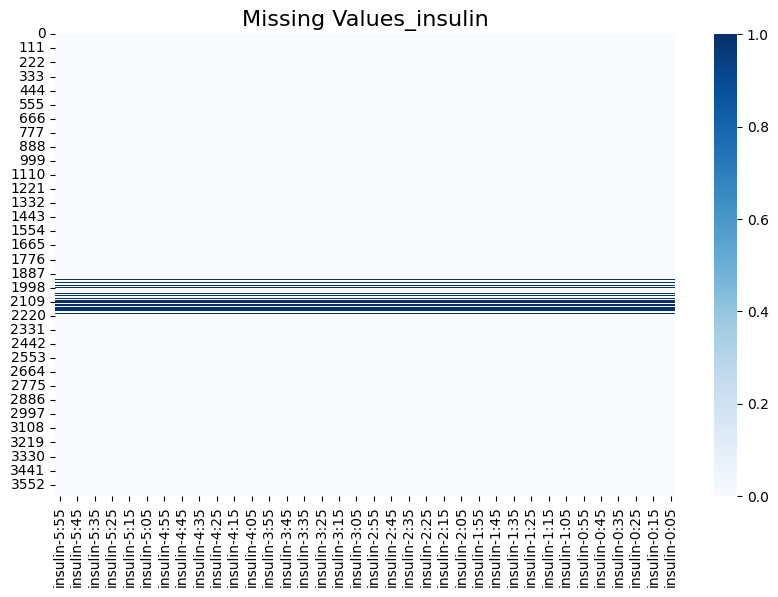

In [100]:
# 인슐린 수치 결측치 분포 히트맵

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 인슐린 데이터 추출
participant_data_insulin = {p: train[train['p_num'] == p].iloc[:, list(range(74, 146))] for p in participant_ids}

# 전체 데이터에 대한 인슐린 결측치 히트맵
I_all = train.iloc[:, list(range(74, 146))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 결측치 히트맵 생성
sns.heatmap(I_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_insulin', fontsize=16)
plt.show()

### 인슐린 수치 결측치 분포 히트맵 분석
이 그래프는 인슐린 수치(`insulin-X:XX`) 데이터의 결측치 분포를 나타내며, 진한 파란색은 결측치가 많음을, 연한 색이나 흰색은 데이터가 있음을 의미합니다.

- **결측 패턴**: 각 행은 특정 시간의 데이터 포인트를, 각 열은 `insulin-X:XX` 컬럼을 나타내며, 진한 색으로 결측치가 시각화됩니다.
- **시간대별 결측**: 중간 구간에 걸쳐 결측치가 집중되는 특정 시간대가 관찰됩니다.

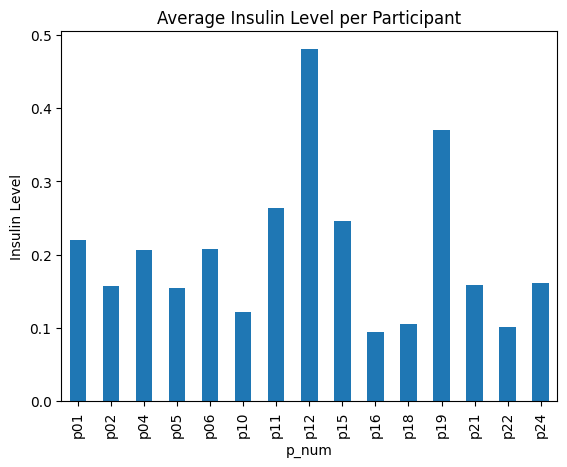

In [101]:
# 참가자별 인슐린 평균 비교
participant_avg_insulin = train.groupby('p_num')['insulin-0:00'].mean()
participant_avg_insulin.plot(kind='bar')
plt.title("Average Insulin Level per Participant")
plt.ylabel("Insulin Level")
plt.show()

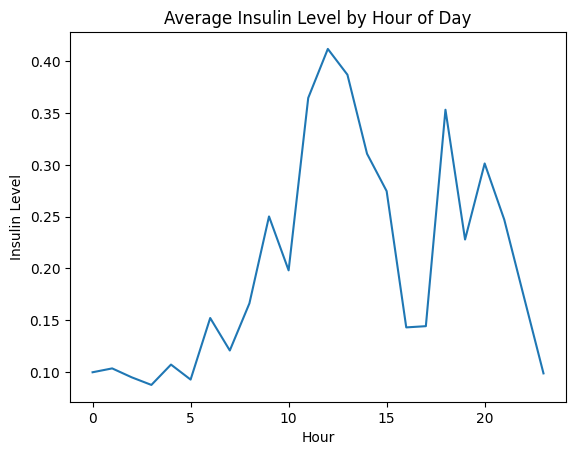

In [102]:
# 시간대별 인슐린 수치 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_insulin = train.groupby('hour')['insulin-0:00'].mean()
hourly_insulin.plot(kind='line')
plt.title("Average Insulin Level by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Insulin Level")
plt.show()

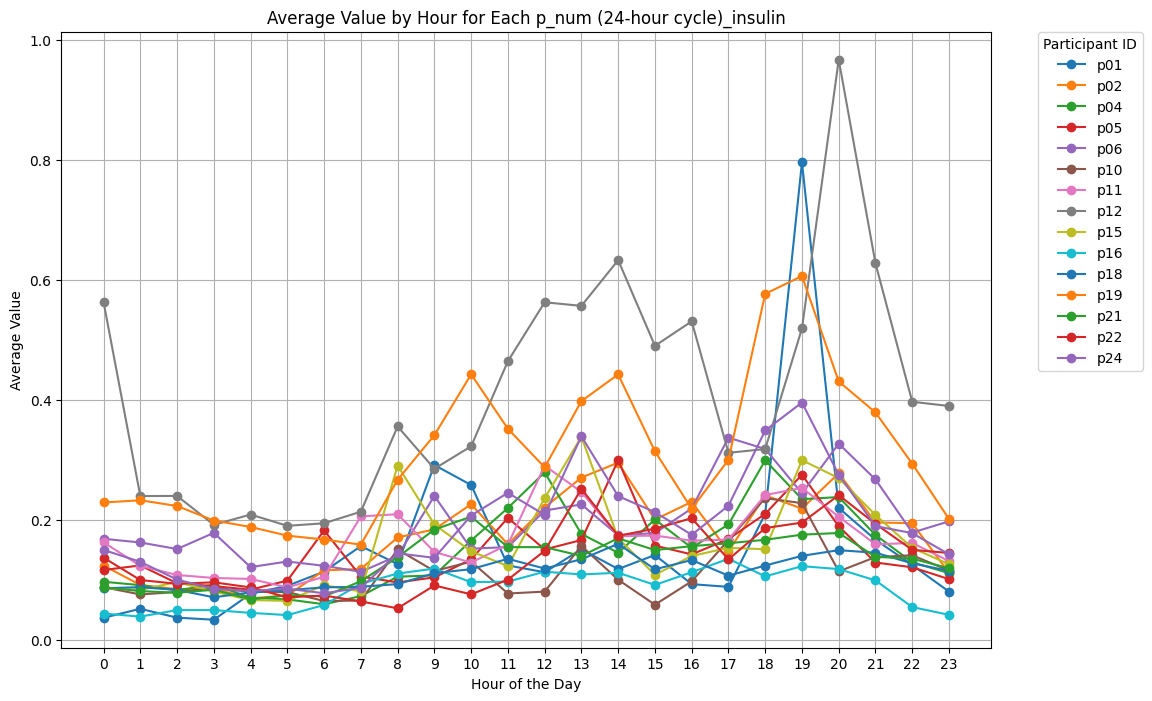

In [103]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt

# 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 인슐린 관련 컬럼 추출
insulin_cols = [col for col in df.columns if col.startswith('insulin-')]

# 각 인슐린 컬럼에 대한 시간 오프셋 계산
time_offsets_insulin = {}
for col in insulin_cols:
    match = re.search(r'insulin-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_insulin[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_insulin = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_insulin.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['insulin_column'] = col
        time_series_list_insulin.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_insulin = pd.concat(time_series_list_insulin, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_insulin['measurement_time'] = pd.to_datetime(time_series_data_insulin['measurement_time'])
time_series_data_insulin['hour'] = time_series_data_insulin['measurement_time'].dt.hour
hourly_avg_by_pnum_insulin = time_series_data_insulin.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_insulin.index:
    plt.plot(hourly_avg_by_pnum_insulin.columns, hourly_avg_by_pnum_insulin.loc[p_num], marker='o', label=p_num)

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_insulin')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


# 시간대별 참가자 인슐린 수치 평균 분석

이 그래프는 각 참가자별 시간대에 따른 평균 인슐린 수치를 시각화한 것

## 주요 관찰점

1. **시간대별 인슐린 수치 패턴**
   - 대부분의 참가자가 밤 시간대에는 낮은 인슐린 수치를 보이며, 아침 이후 점진적으로 증가하는 경향을 나타냅니다.
   - 오후와 저녁 시간대에 인슐린 수치가 급격히 상승하는 패턴이 관찰되며, 이는 아마도 식사와 관련이 있을 가능성이 큽니다.

2. **참가자별 인슐린 수치 차이**
   - 참가자마다 전반적인 인슐린 수치 평균이 다르게 나타나며, 일부는 0.6 이상, 다른 일부는 0.2 이하의 수치를 유지합니다.
   - 이는 개별적인 건강 상태나 인슐린 민감성, 식사 패턴의 차이에서 기인할 수 있습니다.

3. **인슐린 수치의 급격한 변화**
   - 특정 시간대(특히 저녁 시간)에 급격한 인슐린 수치 변화를 보이는 참가자들이 있습니다. 이는 식사나 신체 활동에 따른 결과일 가능성이 큽니다.
   - 일부 참가자는 특정 시간에 인슐린 수치가 급등한 후 빠르게 감소하는 패턴을 보여줍니다.

4. **일관된 패턴**
   - 몇몇 참가자는 하루 동안 인슐린 수치가 일정하게 유지되는 경향이 있습니다. 이는 안정적인 식사나 생활 패턴에 따른 결과로 보입니다.


# 탄수화물 섭취량

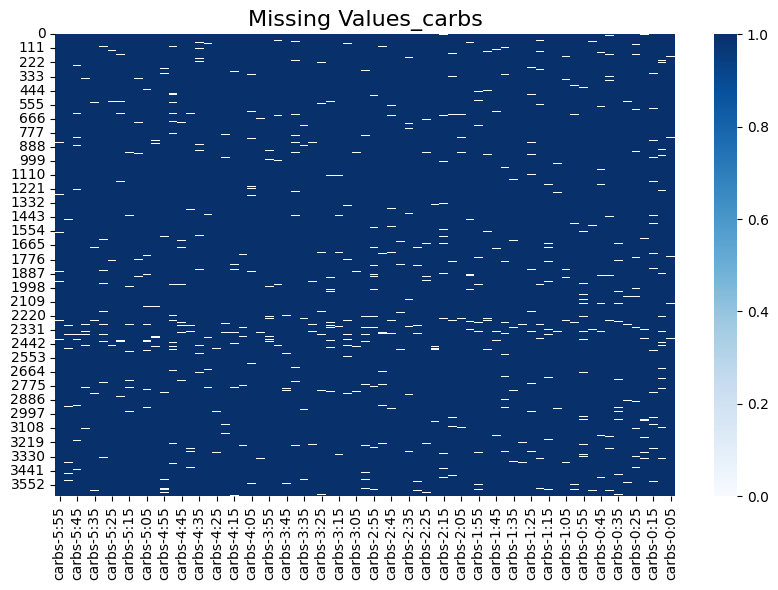

In [104]:
# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 탄수화물 데이터 추출
participant_data_carbs = {p: train[train['p_num'] == p].iloc[:, list(range(146, 218))] for p in participant_ids}

# 전체 데이터에 대한 탄수화물 결측치 히트맵
C_all = train.iloc[:, list(range(146, 218))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 결측치 히트맵 생성
sns.heatmap(C_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_carbs', fontsize=16)
plt.show()



### 탄수화물 섭취량 결측치 분포 히트맵

참가자의 기록에 의존하며, 대부분의 시간대에 탄수화물을 섭취하지 않으므로 결측치가 많은 것을 볼 수 있다.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

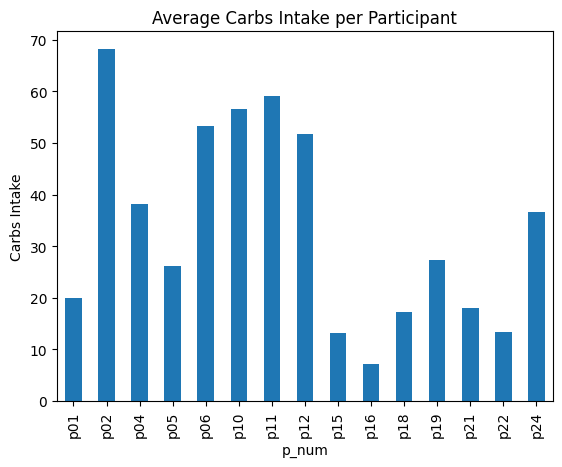

In [105]:
# 참가자별 탄수화물 섭취 평균 비교
participant_avg_carbs = train.groupby('p_num')['carbs-0:00'].mean()
participant_avg_carbs.plot(kind='bar')
plt.title("Average Carbs Intake per Participant")
plt.ylabel("Carbs Intake")
plt

<Axes: xlabel='hour'>

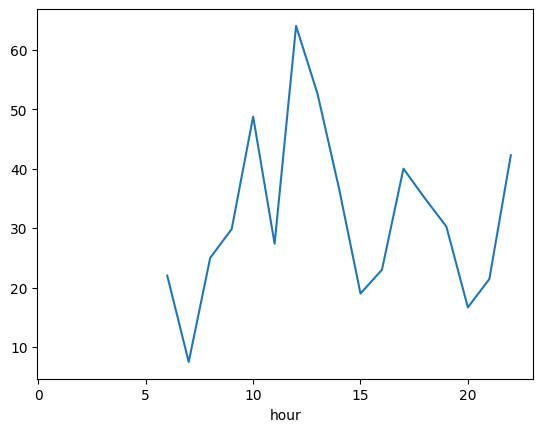

In [106]:
# 시간대별 탄수화물 섭취 수치 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_carbs = train.groupby('hour')['carbs-0:00'].mean()
hourly_carbs.plot(kind='line')

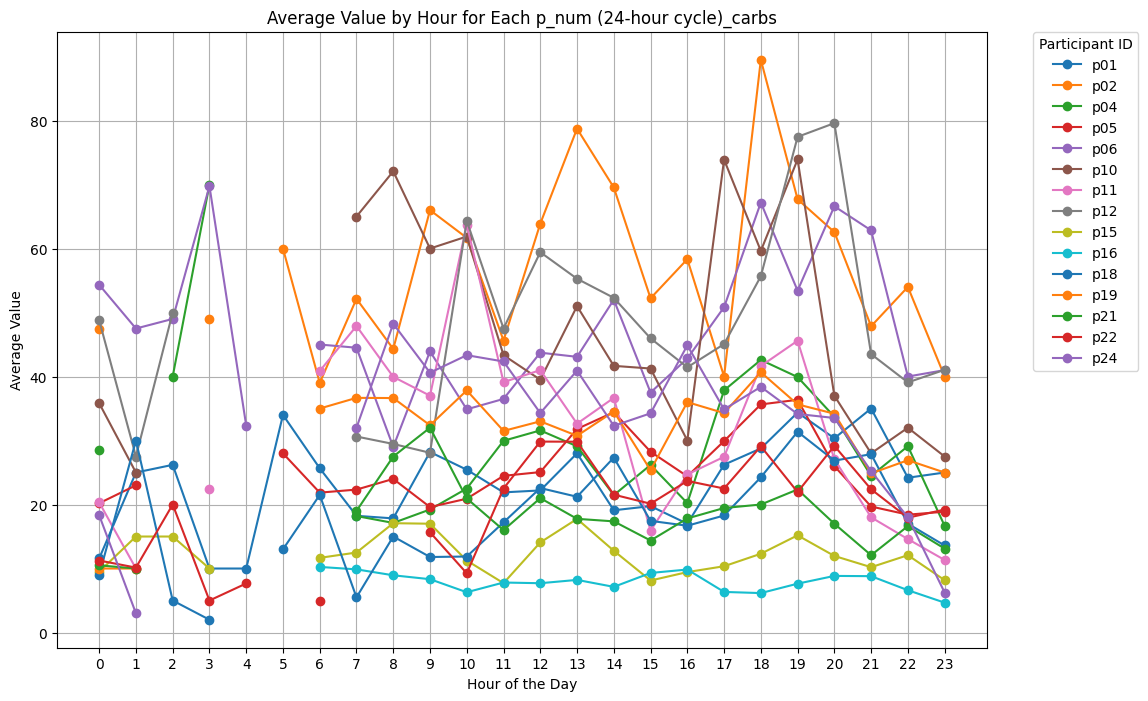

In [107]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 및 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 탄수화물 관련 컬럼 추출
carbs_cols = [col for col in df.columns if col.startswith('carbs-')]

# 각 탄수화물 섭취량 컬럼에 대한 시간 오프셋 계산
time_offsets_carbs = {}
for col in carbs_cols:
    match = re.search(r'carbs-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_carbs[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_carbs = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_carbs.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['carbs_column'] = col
        time_series_list_carbs.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_carbs = pd.concat(time_series_list_carbs, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_carbs['measurement_time'] = pd.to_datetime(time_series_data_carbs['measurement_time'])
time_series_data_carbs['hour'] = time_series_data_carbs['measurement_time'].dt.hour
hourly_avg_by_pnum_carbs = time_series_data_carbs.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_carbs.index:
    plt.plot(hourly_avg_by_pnum_carbs.columns, hourly_avg_by_pnum_carbs.loc[p_num], marker='o', label=p_num)

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_carbs')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# 시간대별 참가자 탄수화물 섭취량 평균 분석

이 그래프는 각 참가자별 시간대에 따른 평균 탄수화물 섭취량을 시각화한 것

## 주요 관찰점

1. **시간대별 탄수화물 섭취 패턴**
   - 대부분의 참가자들이 밤 시간대에는 낮은 탄수화물 섭취량을 보이며, 아침 이후 점진적으로 증가하는 경향이 있습니다.
   - 특히 오후와 저녁 시간대에 탄수화물 섭취량이 급격히 상승하는 패턴이 관찰됩니다. 이는 일반적으로 주요 식사 시간과 일치하며, 아침, 점심, 저녁 시간에 따라 섭취량이 달라지는 것으로 보입니다.

2. **참가자별 탄수화물 섭취 차이**
   - 참가자마다 탄수화물 섭취량의 평균값에 차이가 있으며, 일부 참가자는 섭취량이 60 이상으로 크게 증가하는 반면, 다른 일부는 상대적으로 낮은 수준을 유지하고 있습니다.
   - 이러한 차이는 개인별 식사 습관이나 일상 패턴의 차이에서 기인할 수 있으며, 일부 참가자는 일정한 탄수화물 섭취 패턴을, 일부는 큰 변동을 보이는 패턴을 따르는 것으로 나타납니다.

3. **결측치 고려**
   - 데이터에서 결측치가 많아 일부 시간대나 참가자별로 섭취량의 일관된 패턴을 관찰하는 데 한계가 있을 수 있습니다. 결측치가 많은 구간에서는 섭취량의 정확한 추이를 파악하는 데 어려움이 있습니다.


# 심박수

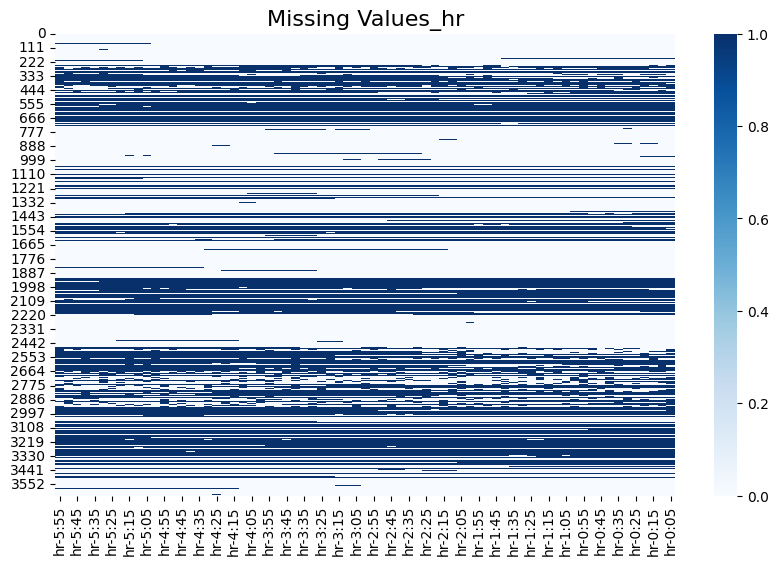

In [108]:
# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 심박수 데이터 추출
participant_data_hr = {p: train[train['p_num'] == p].iloc[:, list(range(218, 290))] for p in participant_ids}

# 전체 데이터에 대한 심박수 결측치 히트맵
H_all = train.iloc[:, list(range(218, 290))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 결측치 히트맵 생성
sns.heatmap(H_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_hr', fontsize=16)
plt.show()


### 심박수 결측치 분포 히트맵 분석
이 그래프는 심박수(`hr-X:XX`) 데이터의 결측치 분포를 나타내며, 진한 파란색은 결측치가 많음을, 연한 색이나 흰색은 데이터가 있음을 의미합니다.

- **결측 패턴**: 각 행은 특정 시간의 데이터 포인트를, 각 열은 `hr-X:XX` 컬럼을 나타내며, 진한 색으로 결측치가 시각화됩니다. 결측치는 다양한 시간대에 걸쳐 나타나며, 특정 시간대에 결측치가 많이 발생하는 경향이 있습니다.

- **시간대별 결측**: 그래프의 중간 구간과 특정 시간대에 걸쳐 결측치가 집중되는 패턴이 관찰됩니다. 이러한 결측 패턴은 데이터 수집 과정에서 일관되지 않거나 특정 시간대에 데이터 수집이 어려웠던 상황을 반영할 가능성이 있습니다.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

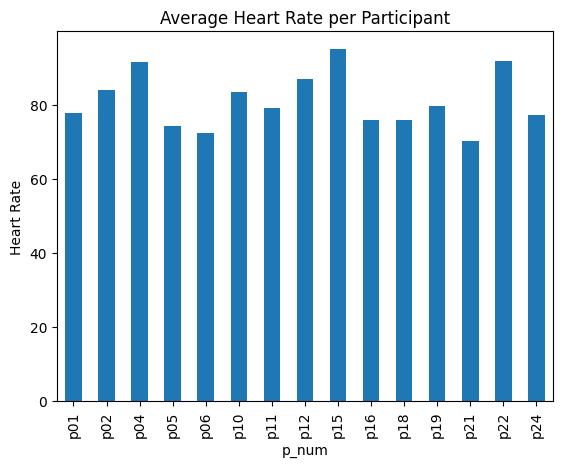

In [109]:
# 참가자별 심박수 평균 비교
participant_avg_hr = train.groupby('p_num')['hr-0:00'].mean()
participant_avg_hr.plot(kind='bar')
plt.title("Average Heart Rate per Participant")
plt.ylabel("Heart Rate")
plt

<Axes: xlabel='hour'>

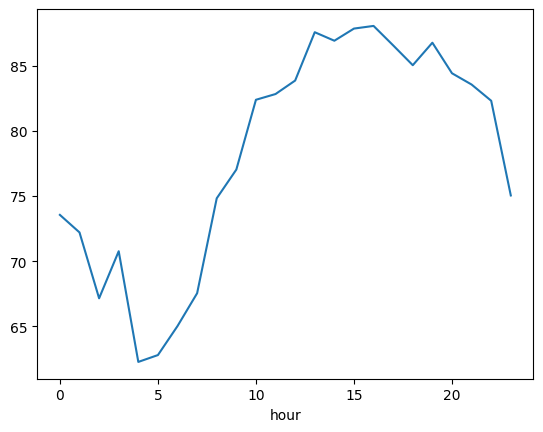

In [110]:
# 시간대별 심박수 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_hr = train.groupby('hour')['hr-0:00'].mean()
hourly_hr.plot(kind='line')

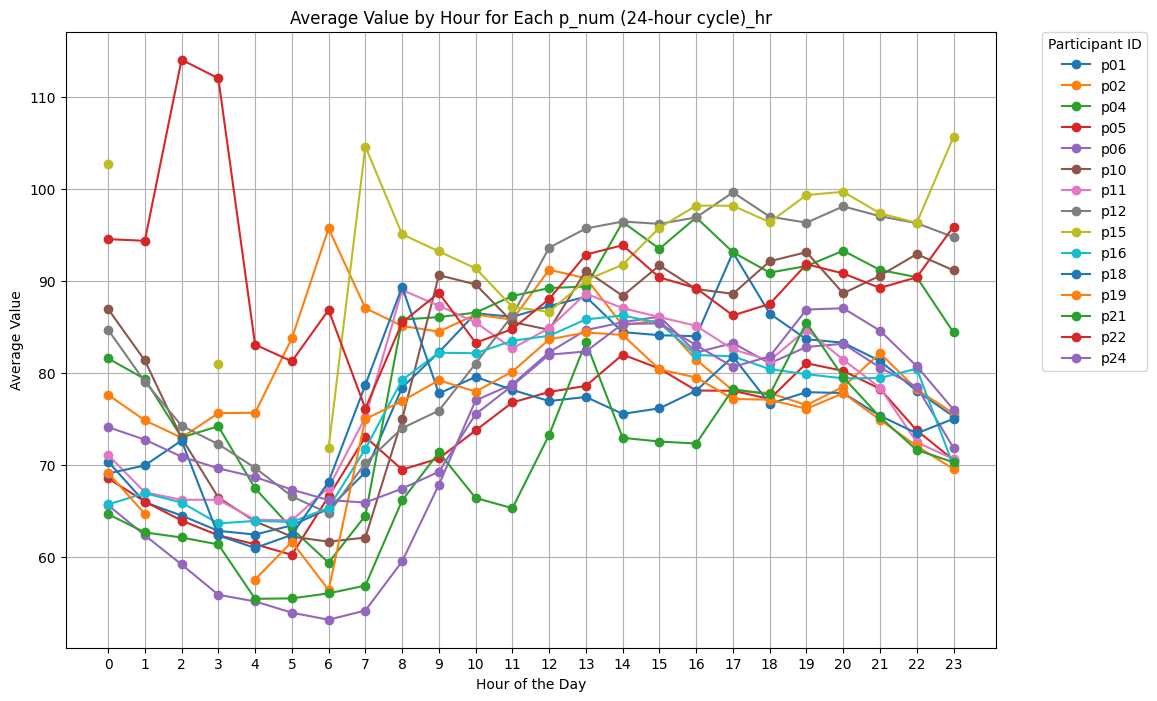

In [111]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 및 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 심박수 관련 컬럼 추출
hr_cols = [col for col in df.columns if col.startswith('hr-')]

# 각 심박수 컬럼에 대한 시간 오프셋 계산
time_offsets_hr = {}
for col in hr_cols:
    match = re.search(r'hr-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_hr[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_hr = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_hr.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['hr_column'] = col
        time_series_list_hr.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_hr = pd.concat(time_series_list_hr, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_hr['measurement_time'] = pd.to_datetime(time_series_data_hr['measurement_time'])
time_series_data_hr['hour'] = time_series_data_hr['measurement_time'].dt.hour
hourly_avg_by_pnum_hr = time_series_data_hr.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_hr.index:
    plt.plot(hourly_avg_by_pnum_hr.columns, hourly_avg_by_pnum_hr.loc[p_num], marker='o', label=p_num)

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_hr')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


# 시간대별 참가자 심박수 평균 분석

이 그래프는 각 참가자별 시간대에 따른 평균 심박수를 시각화한 것

## 주요 관찰점

1. **시간대별 심박수 패턴**
   - 대부분의 참가자들이 밤 시간대에는 비교적 낮은 심박수를 보이며, 아침 이후 활동이 시작되면서 점진적으로 증가하는 경향이 있습니다.
   - 특히, 낮과 저녁 시간대에 심박수가 상승하는 패턴이 관찰되며, 이는 일반적으로 활동량이 많은 시간대와 일치합니다.

2. **참가자별 심박수 차이**
   - 참가자마다 전반적인 심박수 평균값에 차이가 있으며, 일부 참가자는 평균 심박수가 90~100 이상으로 높게 나타나는 반면, 다른 일부는 60~70 수준에서 안정적인 심박수를 유지하고 있습니다.
   - 이는 개별적인 신체 조건이나 활동 패턴의 차이에서 기인할 수 있으며, 일부 참가자는 심박수의 변화가 크게 나타나는 반면, 다른 참가자는 비교적 일관된 심박수를 유지하는 것으로 보입니다.

3. **심박수의 급격한 변화**
   - 일부 참가자는 특정 시간대에 심박수가 급격히 상승하거나 하락하는 패턴을 보이며, 이는 해당 시간대에 활동량이 급격히 변하는 상황과 관련이 있을 수 있습니다.


# 걸음수

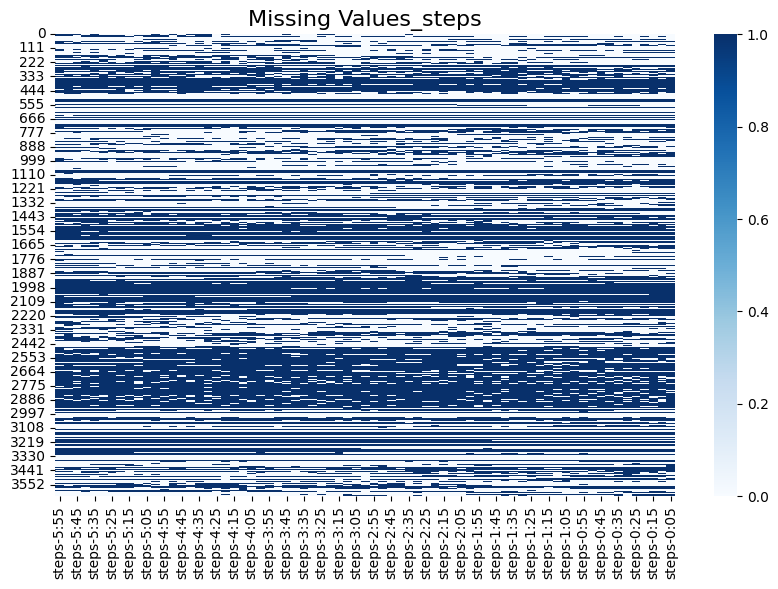

In [112]:
# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 걸음수 데이터 추출
participant_data_steps = {p: train[train['p_num'] == p].iloc[:, list(range(290, 362))] for p in participant_ids}

# 전체 데이터에 대한 걸음수 결측치 히트맵
S_all = train.iloc[:, list(range(290, 362))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 결측치 히트맵 생성
sns.heatmap(S_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_steps', fontsize=16)

plt.show()

### 걸음수 결측치 분포 히트맵 분석
이 그래프는 걸음수(`steps-X:XX`) 데이터의 결측치 분포를 나타내며, 진한 파란색은 결측치가 많음을, 연한 색이나 흰색은 데이터가 있음을 의미합니다.

- **결측 패턴**: 각 행은 특정 시간의 데이터 포인트를, 각 열은 `steps-X:XX` 컬럼을 나타내며, 진한 색을 통해 결측치가 시각화됩니다. 결측치는 특정 시간대와 참가자별로 고르게 나타나기도 하지만, 일부 시간대에서는 결측치가 집중적으로 발생하는 경향이 관찰됩니다.

- **시간대별 결측**: 그래프의 중간 구간과 특정 시간대에 걸쳐 결측치가 집중되는 패턴이 관찰됩니다. 이는 아마도 일부 시간대에 걸음수 데이터 수집이 어려웠거나 데이터가 일관되게 기록되지 않았음을 의미할 수 있습니다.


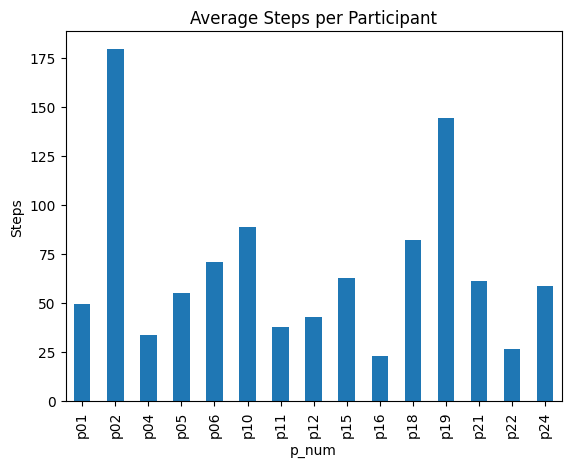

In [113]:
# 참가자별 걸음수 평균 비교
participant_avg_steps = train.groupby('p_num')['steps-0:00'].mean()
participant_avg_steps.plot(kind='bar')
plt.title("Average Steps per Participant")
plt.ylabel("Steps")
plt.show()

<Axes: xlabel='hour'>

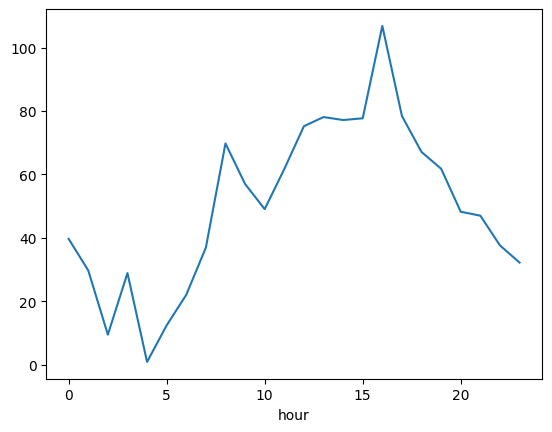

In [114]:
# 시간대별 걸음수 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_steps = train.groupby('hour')['steps-0:00'].mean()
hourly_steps.plot(kind='line')

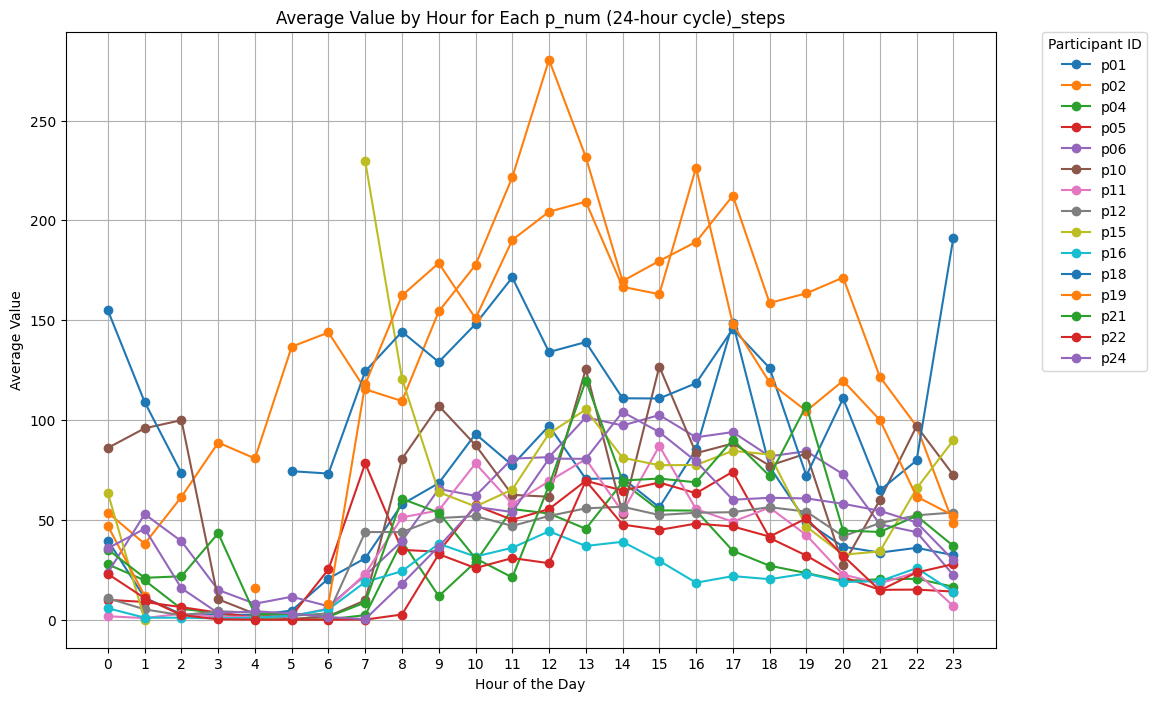

In [115]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 및 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 걸음수 관련 컬럼 추출
steps_cols = [col for col in df.columns if col.startswith('steps-')]

# 각 걸음수 컬럼에 대한 시간 오프셋 계산
time_offsets_steps = {}
for col in steps_cols:
    match = re.search(r'steps-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_steps[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_steps = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_steps.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['steps_column'] = col
        time_series_list_steps.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_steps = pd.concat(time_series_list_steps, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_steps['measurement_time'] = pd.to_datetime(time_series_data_steps['measurement_time'])
time_series_data_steps['hour'] = time_series_data_steps['measurement_time'].dt.hour
hourly_avg_by_pnum_steps = time_series_data_steps.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_steps.index:
    plt.plot(hourly_avg_by_pnum_steps.columns, hourly_avg_by_pnum_steps.loc[p_num], marker='o', label=p_num)

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_steps')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# 시간대별 참가자 걸음수 평균 분석

이 그래프는 각 참가자별 시간대에 따른 평균 걸음수를 시각화한 것

## 주요 관찰점

1. **시간대별 걸음수 패턴**
   - 대부분의 참가자들이 새벽 시간대에는 낮은 걸음수를 보이며, 아침 이후 점진적으로 증가하는 경향이 나타납니다.
   - 특히 오전 중반부터 오후에 걸쳐 걸음수가 상승하는 패턴이 관찰됩니다. 이는 일상적인 활동 시간이 시작되면서 이동량이 증가하는 것으로 해석할 수 있습니다.

2. **참가자별 걸음수 차이**
   - 참가자마다 걸음수의 평균값에 차이가 있으며, 일부 참가자는 걸음수가 100 이상으로 크게 증가하는 반면, 다른 일부는 상대적으로 낮은 수준을 유지합니다.
   - 이러한 차이는 개인별 활동 수준이나 생활 습관의 차이에서 기인할 수 있으며, 일부 참가자는 일관된 활동 패턴을 보이는 반면, 일부는 특정 시간대에 걸음수가 급격히 증가하거나 감소하는 변동이 관찰됩니다.

3. **결측치 고려**
   - 데이터에서 결측치가 많아 일부 시간대나 참가자별로 걸음수의 일관된 패턴을 관찰하는 데 한계가 있을 수 있습니다. 결측치가 많은 구간에서는 걸음수의 정확한 추이를 파악하는 데 어려움이 있습니다.


# 칼로리 소비량

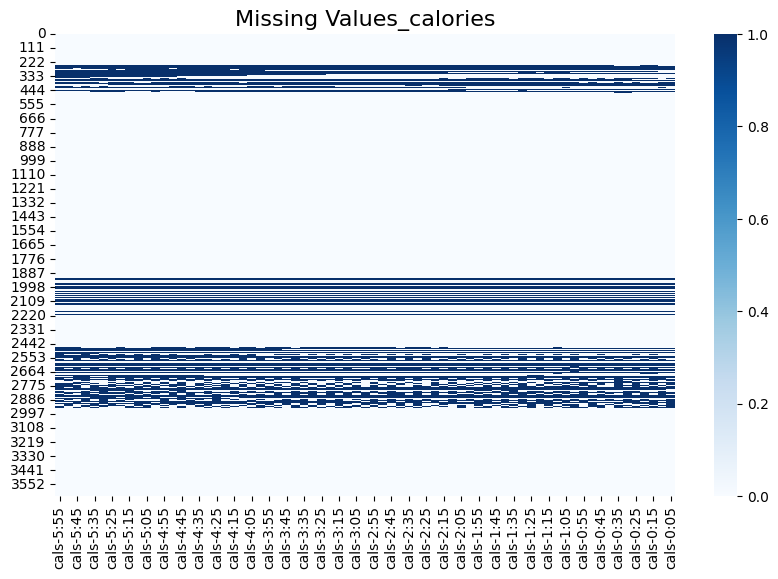

In [116]:
# 칼로리 소비량 결측치 분포 히트맵

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 각 참가자의 칼로리 소비량 데이터 추출
participant_data_calories = {p: train[train['p_num'] == p].iloc[:, list(range(362, 434))] for p in participant_ids}

# 전체 데이터에 대한 칼로리 소비량 결측치 히트맵
C_all = train.iloc[:, list(range(362, 434))]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 결측치 히트맵 생성
sns.heatmap(C_all.iloc[:, 1:].isna(), cmap='Blues')
ax.set_title('Missing Values_calories', fontsize=16)
plt.show()

### 칼로리 소비량 결측치 분포 히트맵 분석
이 그래프는 칼로리 소비량(`calories-X:XX`) 데이터의 결측치 분포를 나타내며, 진한 파란색은 결측치가 많음을, 연한 색이나 흰색은 데이터가 있음을 의미합니다.

- **결측 패턴**: 각 행은 특정 시간의 데이터 포인트를, 각 열은 `calories-X:XX` 컬럼을 나타내며, 진한 파란색 부분이 결측치가 많은 구간을 시각적으로 보여줍니다. 결측치는 일부 특정 시간대에 집중되어 나타납니다.

- **시간대별 결측**: 그래프에서 중간 시간대 및 특정 구간에서 결측치가 많이 나타나는 패턴이 관찰됩니다. 이는 일부 시간대에 데이터 수집이 어려웠거나 특정 시간에 칼로리 소비가 집중되었을 가능성을 의미합니다.

- **참가자별 결측 경향**: 특정 참가자의 경우 특정 시간대에 칼로리 소비량 데이터가 일관되게 결측되는 경향을 보이며, 이는 해당 시간대의 활동 데이터 수집이 일관되지 않았음을 나타낼 수 있습니다.

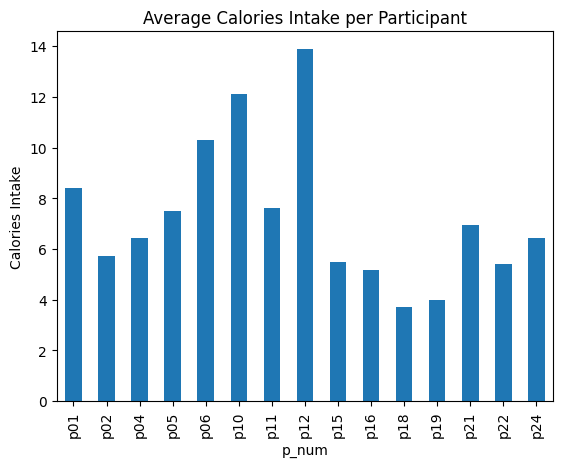

In [117]:
# 참가자별 칼로리 소비량 평균 비교
participant_avg_calories = train.groupby('p_num')['cals-0:00'].mean()
participant_avg_calories.plot(kind='bar')
plt.title("Average Calories Intake per Participant")
plt.ylabel("Calories Intake")
plt.show()

<Axes: xlabel='hour'>

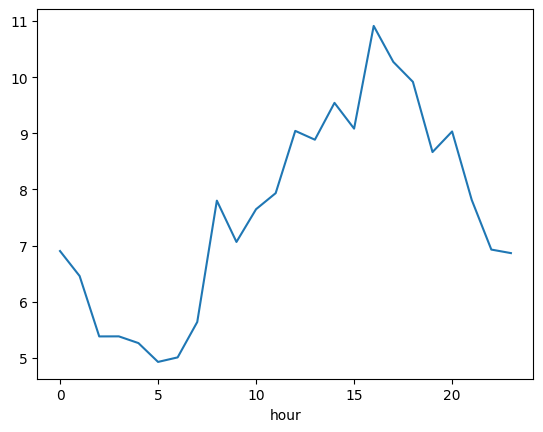

In [118]:
# 시간대별 칼로리 소비량 평균
train['hour'] = pd.to_datetime(train['time']).dt.hour
hourly_calories = train.groupby('hour')['cals-0:00'].mean()
hourly_calories.plot(kind='line')

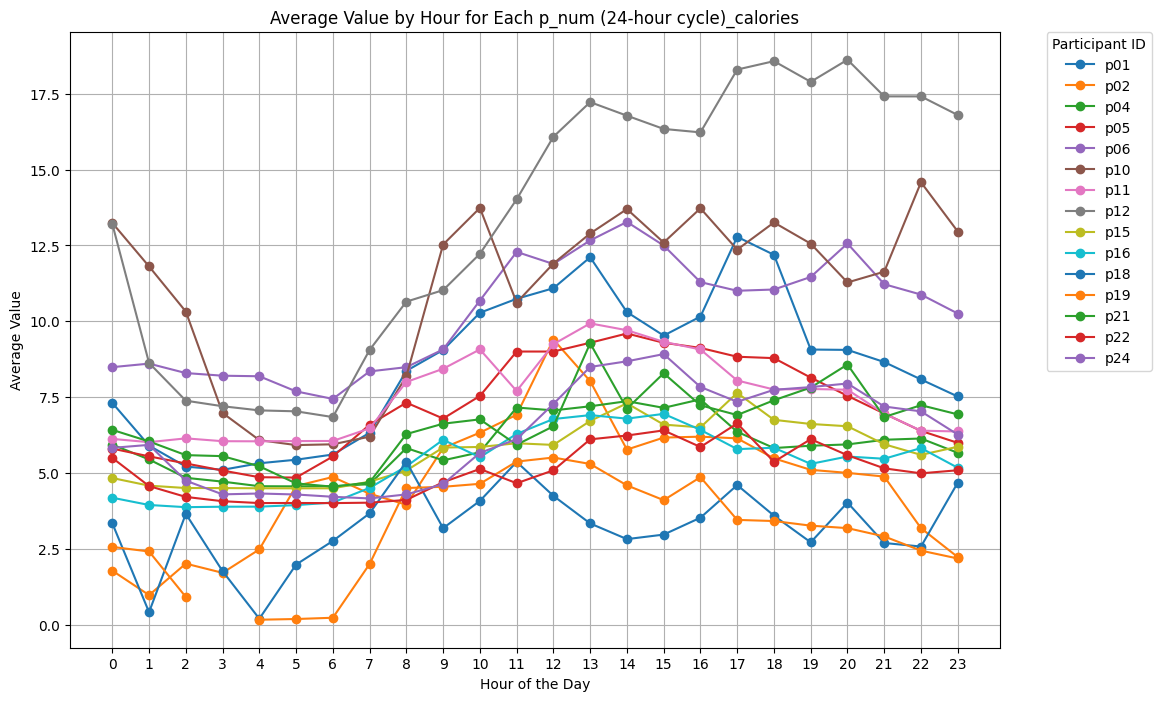

In [119]:
from pandas.tseries.offsets import Minute
import re
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 및 'time' 컬럼을 datetime 형식으로 변환
df = train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 참가자 목록 추출
participant_ids = sorted(list(set(train['p_num'])))

# 칼로리 소비량 관련 컬럼 추출
calories_cols = [col for col in df.columns if col.startswith('cals-')]

# 각 칼로리 소비량 컬럼에 대한 시간 오프셋 계산
time_offsets_calories = {}
for col in calories_cols:
    match = re.search(r'cals-(\d+):(\d+)', col)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        total_minutes = hours * 60 + minutes
        offset = -total_minutes
        time_offsets_calories[col] = offset

# 각 참가자의 데이터 프레임 생성 및 시간 변환
time_series_list_calories = []
for p_num in participant_ids:
    participant_data = train[train['p_num'] == p_num]
    for col, offset in time_offsets_calories.items():
        temp_df = participant_data[['p_num', 'time']].copy()
        temp_df['measurement_time'] = participant_data['time'] + Minute(offset)
        temp_df['value'] = participant_data[col]

        temp_df['original_time'] = participant_data['time']
        temp_df['calories_column'] = col
        time_series_list_calories.append(temp_df)

# 결합된 시간 시리즈 데이터 프레임 생성 및 결측값 제거
time_series_data_calories = pd.concat(time_series_list_calories, ignore_index=True).dropna(subset=['value'])

# 측정 시간으로부터 'hour' 추출하여 시간대별 평균 계산
time_series_data_calories['measurement_time'] = pd.to_datetime(time_series_data_calories['measurement_time'])
time_series_data_calories['hour'] = time_series_data_calories['measurement_time'].dt.hour
hourly_avg_by_pnum_calories = time_series_data_calories.groupby(['p_num', 'hour'])['value'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for p_num in hourly_avg_by_pnum_calories.index:
    plt.plot(hourly_avg_by_pnum_calories.columns, hourly_avg_by_pnum_calories.loc[p_num], marker='o', label=p_num)

plt.title('Average Value by Hour for Each p_num (24-hour cycle)_calories')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(24))

plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


# 시간대별 참가자 칼로리 소비량 평균 분석

이 그래프는 각 참가자별 시간대에 따른 평균 칼로리 소비량을 시각화한 것

## 주요 관찰점

1. **시간대별 칼로리 소비 패턴**
   - 대부분의 참가자들이 새벽과 이른 아침 시간대에는 낮은 칼로리 소비량을 보이며, 오전 시간부터 점진적으로 증가하는 경향이 있습니다.
   - 특히 낮 시간대와 오후 시간대에 칼로리 소비량이 비교적 높게 나타나는 패턴이 관찰되며, 이는 주로 활동량이 많은 시간대와 일치할 수 있습니다.

2. **참가자별 칼로리 소비 차이**
   - 참가자마다 칼로리 소비량의 평균값에 차이가 있으며, 일부 참가자는 소비량이 15 이상으로 높게 유지되는 반면, 다른 일부는 상대적으로 낮은 수준인 5 이하의 소비량을 유지하고 있습니다.
   - 이러한 차이는 개인의 일상 생활 패턴, 신체 활동량 및 생활 습관에 따른 차이에서 기인할 수 있습니다. 일부 참가자는 일정한 칼로리 소비 패턴을 보이는 반면, 일부는 시간대에 따라 큰 변동을 보입니다.

3. **결측치 고려**
   - 데이터에서 결측치가 많이 나타나는 구간이 있어, 일부 시간대나 참가자별로 소비량의 일관된 패턴을 관찰하는 데 어려움이 있을 수 있습니다. 특히 특정 시간대에서 결측치가 집중적으로 발생하는 경우, 해당 시간대의 칼로리 소비량을 정확하게 평가하는 데 한계가 있습니다.


# 활동

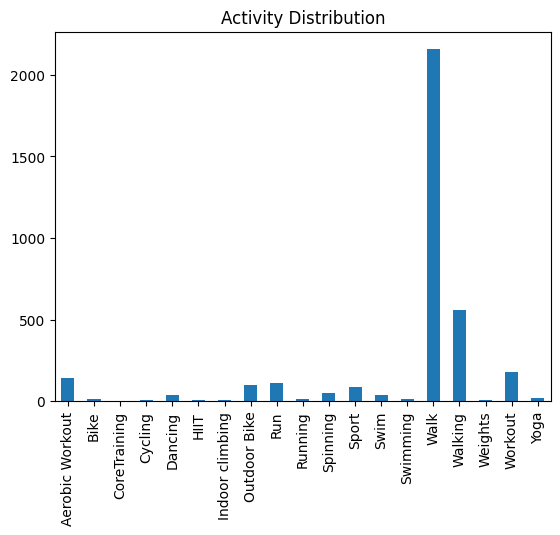

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# activity 컬럼들 확인 및 시각화
activity_columns = [col for col in train.columns if 'activity' in col]
activity_counts = train[activity_columns].apply(pd.Series.value_counts)
activity_counts.sum(axis=1).plot(kind='bar')
plt.title("Activity Distribution")
plt.show()

### 활동 분석

1. **Main Activities**
   - **Walk**: 가장 많이 기록된 활동으로, 다른 모든 활동에 비해 압도적으로 높은 빈도를 차지함.
   - **Walking** 및 **Weights**: 두 번째로 많이 수행된 활동으로, Walk보다는 빈도가 낮지만 다른 활동에 비해 많이 기록됨.

2. **Other Activities**
   - **Aerobic Workout**, **Indoor Climbing**, **Running** 등은 낮은 빈도로 기록됨.
   - **Yoga**와 **Dancing**과 같은 활동은 거의 기록되지 않음. 이는 특정 상황에서만 수행되기 때문일 수 있음.

3. **Activity Distribution Pattern**
   - 데이터가 몇몇 주요 활동(Walk, Weights 등)에 집중되어 있으며, 대부분의 활동은 낮은 빈도를 보임.
   - 활동 데이터에 불균형이 존재하며, 일상적인 걷기 활동을 중심으로 데이터가 수집됨.

이 데이터는 주로 **일상적인 걷기 활동**에 대한 기록이 많으며, 다양한 운동보다는 반복적으로 측정되는 일상 활동이 중심이 된 것으로 보임.

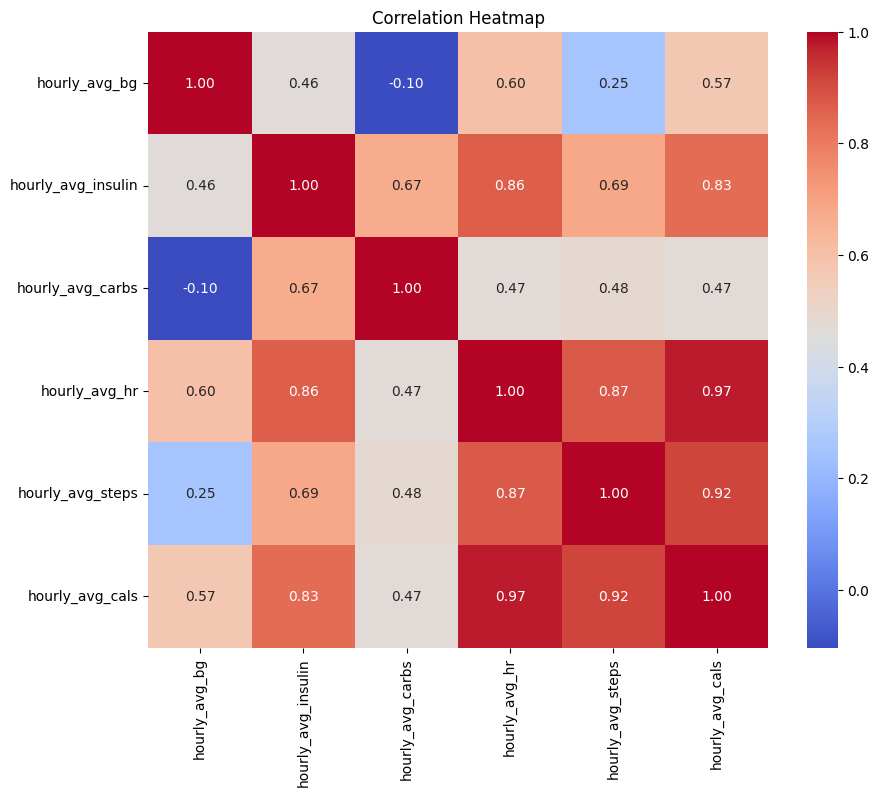

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 각 변수별 시간대 평균 계산
hourly_avg_by_pnum_bg_mean = hourly_avg_by_pnum_bg.mean()
hourly_avg_by_pnum_insulin_mean = hourly_avg_by_pnum_insulin.mean()
hourly_avg_by_pnum_carbs_mean = hourly_avg_by_pnum_carbs.mean()
hourly_avg_by_pnum_hr_mean = hourly_avg_by_pnum_hr.mean()
hourly_avg_by_pnum_steps_mean = hourly_avg_by_pnum_steps.mean()
hourly_avg_by_pnum_calories_mean = hourly_avg_by_pnum_calories.mean()

# 시간대 평균 데이터프레임 생성 및 컬럼 이름 지정
hourly_avg_df = pd.concat([
    hourly_avg_by_pnum_bg_mean,
    hourly_avg_by_pnum_insulin_mean,
    hourly_avg_by_pnum_carbs_mean,
    hourly_avg_by_pnum_hr_mean,
    hourly_avg_by_pnum_steps_mean,
    hourly_avg_by_pnum_calories_mean
], axis=1)

hourly_avg_df.columns = [
    'hourly_avg_bg',
    'hourly_avg_insulin',
    'hourly_avg_carbs',
    'hourly_avg_hr',
    'hourly_avg_steps',
    'hourly_avg_cals',
]

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(hourly_avg_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 상관 관계 분석 요약

- **심박수와 칼로리 소비량**: 매우 높은 양의 상관 관계 (0.97)  
  - 심박수가 높아지면 칼로리 소비량도 증가하는 경향을 보임

- **걸음 수와 심박수**: 높은 양의 상관 관계 (0.87)  
  - 활동량이 증가하면 심박수도 함께 높아지는 경향

- **인슐린과 심박수**: 강한 양의 상관 관계 (0.86)  
  - 인슐린 수치가 높을 때 심박수도 높아질 가능성

- **혈당과 심박수**: 중간 수준의 양의 상관 관계 (0.60)  
  - 혈당 수치와 심박수 간에는 일부 연관성 존재

- **혈당과 탄수화물 섭취량**: 약한 음의 상관 관계 (-0.10)  
  - 혈당과 탄수화물 섭취 간의 연관성은 크지 않음

- **걸음 수와 칼로리 소비량**: 높은 양의 상관 관계 (0.92)  
  - 활동량이 많아질수록 칼로리 소모가 함께 증가

- **인슐린과 칼로리 소비량**: 강한 양의 상관 관계 (0.83)  
  - 활동적인 시간대에 인슐린 사용과 칼로리 소비가 함께 증가하는 경향

In [123]:
# test.csv을 읽고 pandas dataframe으로 만들기
test = pd.read_csv("/content/data/test.csv")

In [124]:
# test데이터 프레임의 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 507 entries, id to activity-0:00
dtypes: float64(432), object(75)
memory usage: 14.1+ MB


In [125]:
test.head(10)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

In [126]:
# test 데이터 셋의 참가자 목록 확인
test['p_num'].unique()

array(['p01', 'p02', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12', 'p15',
       'p16', 'p18', 'p19', 'p21', 'p22', 'p24'], dtype=object)

In [127]:
# test의 열별 기초통계량
test.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cals-3:20,cals-3: